<a href="https://colab.research.google.com/github/rahulprasadns/AIDI_AI_ALGO_FINAL_PROJECT/blob/main/FinalProject_AIAlgo_StressLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Importing Packages


In [1]:
#Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

Connecting collab to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data from drive

In [3]:
df = pd.read_csv('/content/drive/My Drive/Stresslevel.csv')

Defining the data on Inputs and Outputs

In [4]:
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

Taking a look at the data

In [5]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


Shape of the data

In [6]:
df.shape

(2001, 4)

headers of the data

In [7]:
print(df.columns.values[0:4])

['Humidity' 'Temperature' 'Step count' 'Stress Level']


Checking the null values

In [8]:
print(df.isnull().sum())

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64


# Describing each stress level

In [9]:
# Descriptive statistics of the least stressed level (0)

summary = (df[df['Stress Level'] == 0].describe().transpose().reset_index())
summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)
val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Humidity,501.0,12.500,1.448,10.0,11.25,12.5,13.75,15.0
1,Temperature,501.0,81.500,1.448,79.0,80.25,81.5,82.75,84.0
2,Step count,501.0,42.934,26.199,0.0,20.00,41.0,65.00,90.0
3,Stress Level,501.0,0.000,0.000,0.0,0.00,0.0,0.00,0.0


In [10]:
# Descriptive statistics of the middle stressed level (1)

summary = (df[df['Stress Level'] == 1].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Humidity,790.0,18.955,2.282,15.01,16.982,18.955,20.928,22.9
1,Temperature,790.0,87.955,2.282,84.01,85.982,87.955,89.928,91.9
2,Step count,790.0,78.130,37.677,0.00,48.000,88.000,110.000,129.0
3,Stress Level,790.0,1.000,0.000,1.00,1.000,1.000,1.000,1.0


In [11]:
# Descriptive statistics of the most stressed level (2)

summary = (df[df['Stress Level'] == 2].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Humidity,710.0,26.455,2.051,22.91,24.682,26.455,28.228,30.0
1,Temperature,710.0,95.455,2.051,91.91,93.682,95.455,97.228,99.0
2,Step count,710.0,165.000,20.508,130.00,147.000,165.000,183.000,200.0
3,Stress Level,710.0,2.000,0.000,2.00,2.000,2.000,2.000,2.0


checking if there is any imbalance data

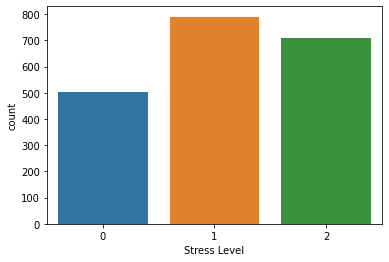

In [12]:
sns.countplot(x="Stress Level", data =df)
plt.show()

In [13]:
# We can see that data is not imbalance

Plot a pie chart for different stress levels


[790, 710, 501]


Text(0.5, 1.0, 'Stress Levels')

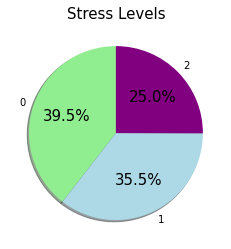

In [14]:
stress_level = df["Stress Level"].value_counts().tolist()
labels = ['0','1', '2']
values = [stress_level[0], stress_level[1], stress_level[2]]
print(values)
colors = ['lightgreen', 'lightblue', 'purple']
fix, ax1 = plt.subplots()
# the autopct is to get the percentage values.
_, texts, autotexts = ax1.pie(values, labels=labels, colors=colors, startangle = 90,shadow=True, autopct='%1.1f%%')
list(map(lambda x:x.set_fontsize(15), autotexts))
ax1.set_title("Stress Levels", fontsize=15)

Correlation of variables with the Stress Level


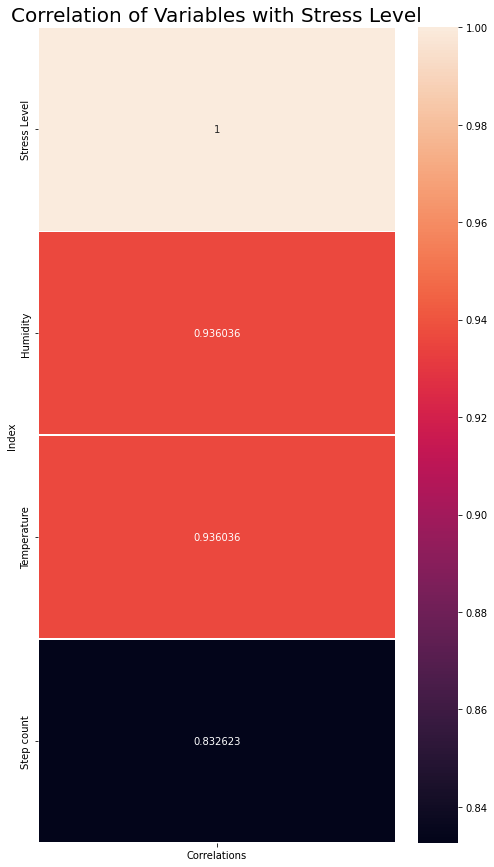

In [15]:
corr = df.corrwith(df['Stress Level']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(8, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", linewidths=0.4)

plt.title("Correlation of Variables with Stress Level", fontsize=20)
plt.show()

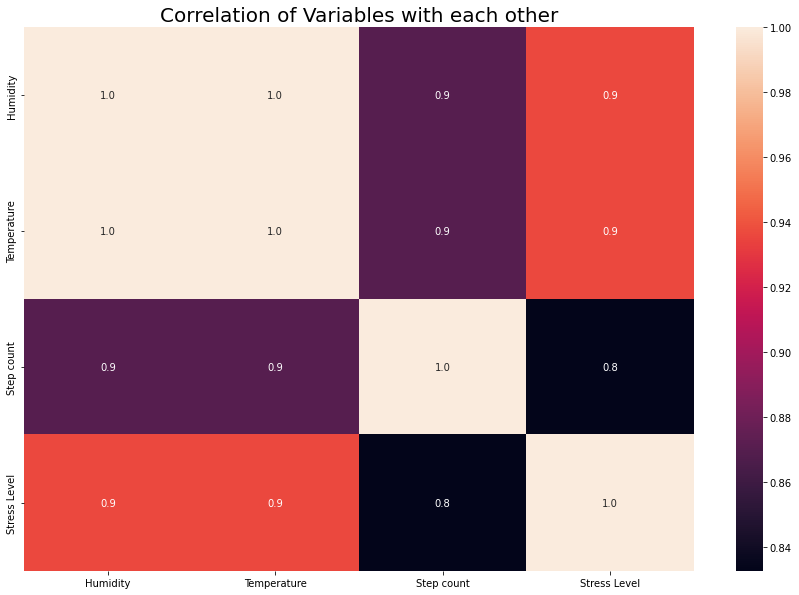

In [16]:
#Correlation of variables with eachother
plt.figure(figsize=(15,10))
plt.title("Correlation of Variables with each other", fontsize=20 )
sns.heatmap(df.corr(), annot = True, fmt = '.1f' )

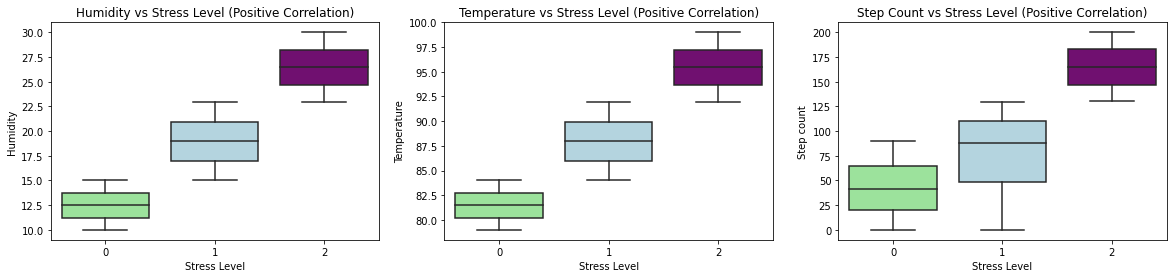

In [17]:
#Creating boxplot
f, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="Stress Level", y="Humidity", data=df, palette=colors, ax=axes[0])
axes[0].set_title('Humidity vs Stress Level (Positive Correlation)')

sns.boxplot(x="Stress Level", y="Temperature", data=df, palette=colors, ax=axes[1])
axes[1].set_title('Temperature vs Stress Level (Positive Correlation)')

sns.boxplot(x="Stress Level", y="Step count", data=df, palette=colors, ax=axes[2])
axes[2].set_title('Step Count vs Stress Level (Positive Correlation)')

plt.show()

Plotting T-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2001 samples in 0.003s...
[t-SNE] Computed neighbors for 2001 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 2.757360
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.331356
[t-SNE] KL divergence after 1000 iterations: 0.359171


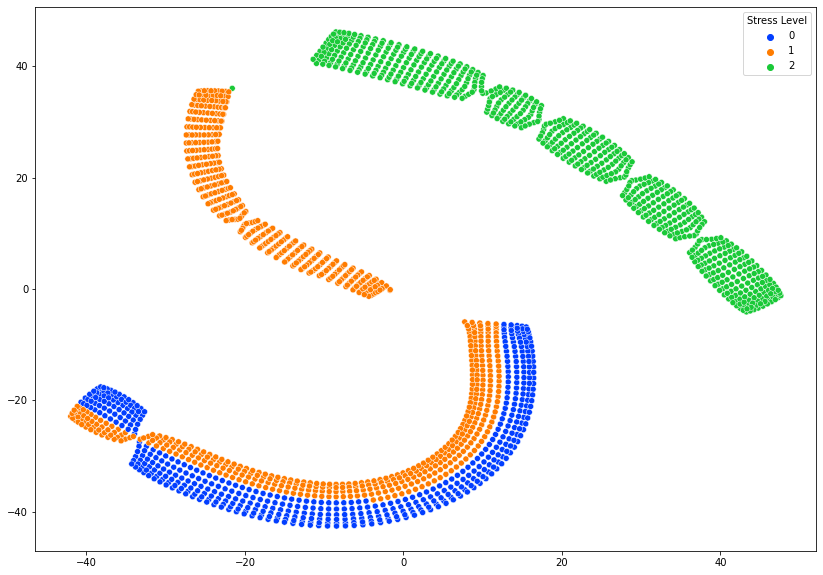

In [18]:
from sklearn.manifold import TSNE
X_for_tsne = df.drop(['Stress Level'], axis=1)

# Commented out IPython magic to ensure Python compatibility.
# %time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

plt.figure(figsize=(14,10))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df["Stress Level"],palette="bright")

Updating Inputs and Outputs with Standard scalar to check if there is any change

In [19]:
standard_scaler = StandardScaler()
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']
#Scale features to improve the training ability of TSNE.
X_Scaled = standard_scaler.fit_transform(X.values)

In [20]:
# t-SNE

X_reduced_tsne = TSNE(n_components=2, random_state=2).fit_transform(X_Scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE after StandardScaler


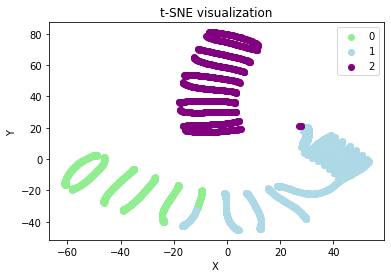

In [21]:
color_map = {2:'purple', 1:'lightblue', 0:'lightgreen'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X_reduced_tsne[y==cl,0], 
                y=X_reduced_tsne[y==cl,1], 
                c=color_map[idx], 
                label=cl)
plt.xlabel('X ')
plt.ylabel('Y ')
plt.legend(loc='best')
plt.title('t-SNE visualization')
plt.show()

Implementing Algo

Support vector Machine

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # SVM algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # evaluation metric
import itertools # advanced tools
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [24]:
#Without standard scalar

svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)


In [25]:
print('Accuracy score of the SVM model is :'+str(accuracy_score(y_test, svm_ypred)))

Accuracy score of the SVM model is :1.0


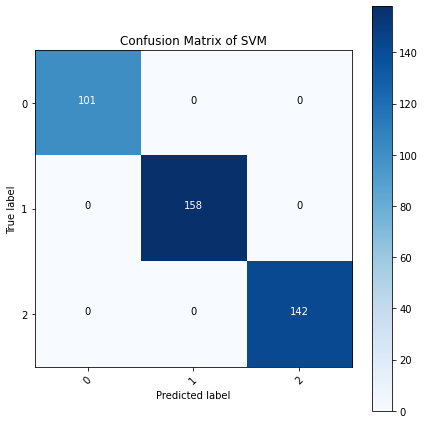

In [26]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

svm_matrix = confusion_matrix(y_test, svm_ypred) # Support Vector Machine

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

In [27]:
#Predict the stress with user input values
print(svm.predict([[20,80,200]]))

[2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
#With standard scalar

X_train= standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)

In [29]:
print('Accuracy score of the SVM model is :'+str(accuracy_score(y_test, svm_ypred)))

Accuracy score of the SVM model is :0.9975062344139651


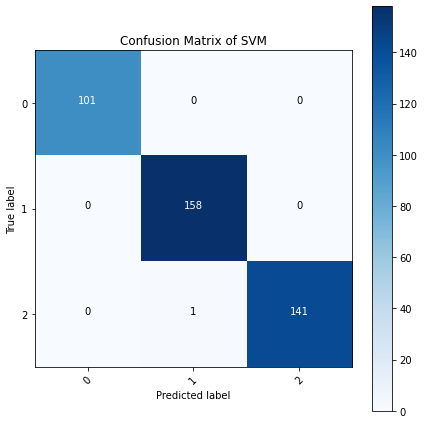

In [30]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

svm_matrix = confusion_matrix(y_test, svm_ypred) # Support Vector Machine

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['0','1','2'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()